# 9_Закрепление знаний

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px

In [22]:
churn_data = pd.read_csv('C:\IDE\PY_13_Визуализация_данных\data\churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [23]:
churn_data = churn_data.drop('RowNumber', axis=1)
# Удалим за ненужностью столбец RowNumber 

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

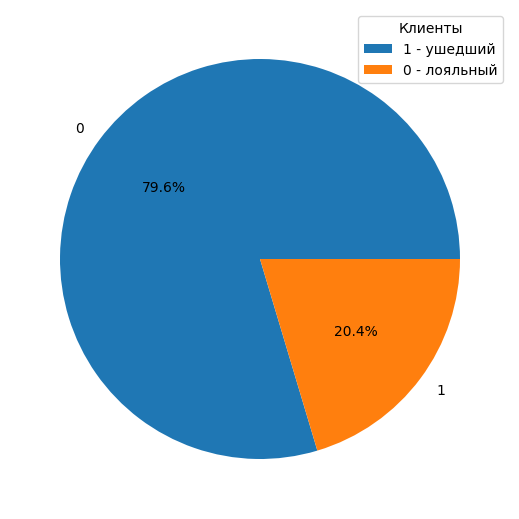

In [24]:
loyal_rate = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyal_rate,
    labels = loyal_rate.index,
    autopct='%.1f%%'
);
axes.legend(['1 - ушедший', '0 - лояльный'],
    title="Клиенты",
    );

Вывод: Банк имеет достаточно большой процент лояльных клиентов, но неизвестно за какой промежуток времени ушли 20% клиентов и насколько прибыльными они были

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

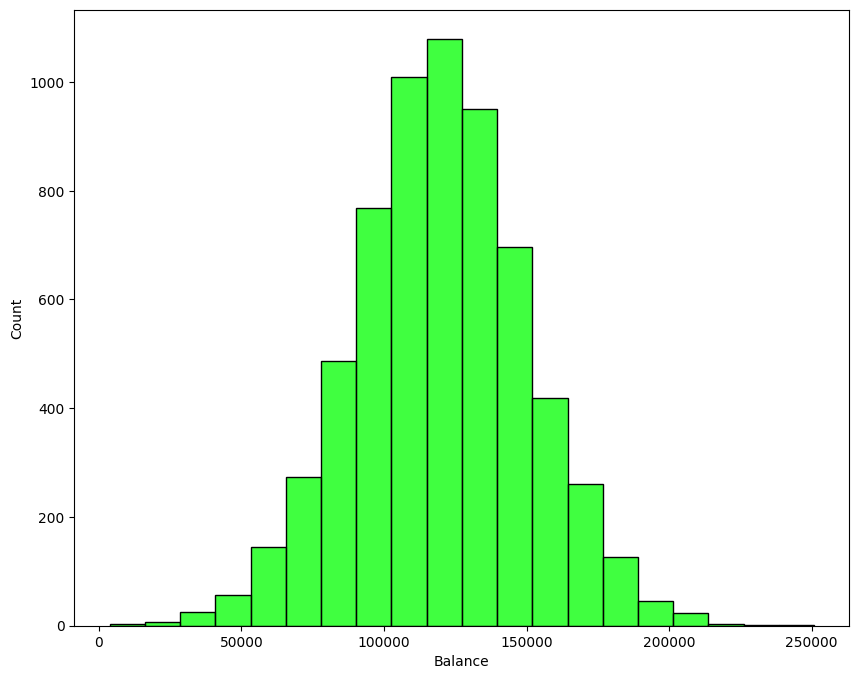

In [25]:
# Отсортируем клиентов, у которых баланс больше 2500
us_bal = churn_data[churn_data['Balance'] > 2500]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.histplot(
    data = us_bal,
    x = 'Balance',
    bins=20,
    color = 'lime'
);


Вывод: Большинство клиентов имеет на балансе больше 100000$, диаграмма имеет нормальное распределение

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

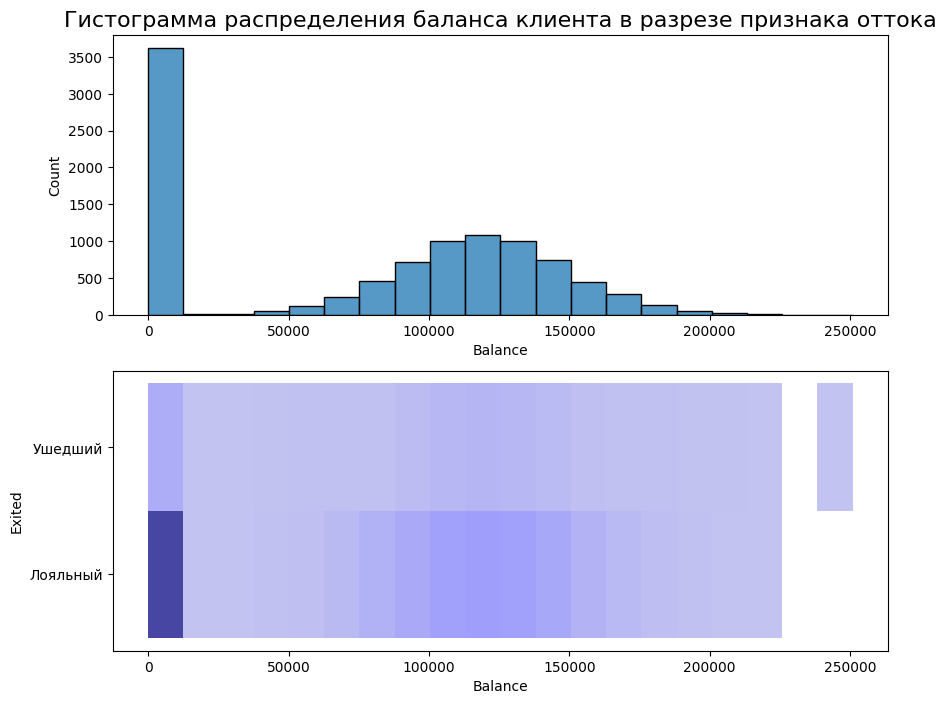

In [26]:
churn_DF = churn_data.copy()
churn_DF = churn_DF.replace({'Exited':{1:'Ушедший', 0:'Лояльный'}}) # заменяем числовые значения на строки
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=churn_DF,
    x='Balance',
    bins=20,
    ax=axes[0]
);
axes[0].set_title('Гистограмма распределения баланса клиента в разрезе признака оттока', fontsize=16)
sns.histplot(
    data=churn_DF,
    x='Balance',
    y='Exited',
    bins=20,
    color='blue',
    ax=axes[1]
);

Вывод: Большинство ушедших клиентов были с балансом от 100 до 150 тыс. $, отметая выбросы с нулевым балансом.

Причинами могут быть:
1. Малый процент по вкладу
2. Слишком малая сумма для снятия наличных в банкоматах
3. Большая коммисия на переводы

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

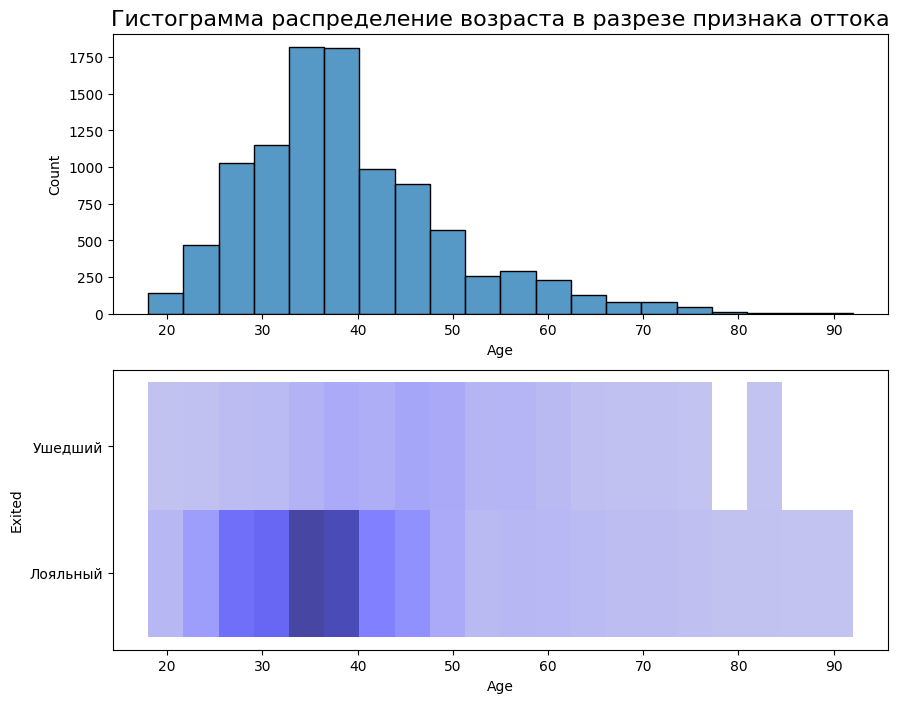

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data = churn_DF,
    x = 'Age',
    bins = 20,
    ax = axes[0]
);
axes[0].set_title('Гистограмма распределение возраста в разрезе признака оттока', fontsize=16)
sns.histplot(
    data = churn_DF,
    x = 'Age',
    y = 'Exited',
    bins = 20,
    color = 'blue',
    ax=axes[1]
);

Вывод: Большинство ушедших клиентов были в возрасте от 26 до 62 лет, банку стоит обратить на них внимание

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

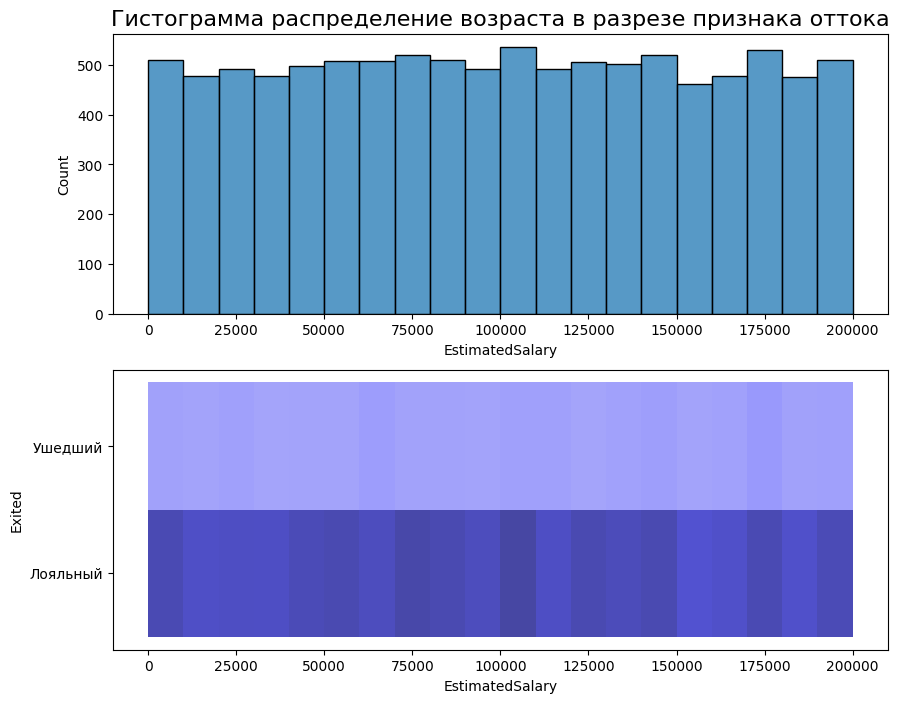

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data = churn_DF,
    x = 'EstimatedSalary',
    bins=20,
    ax=axes[0]
);
axes[0].set_title('Гистограмма распределение возраста в разрезе признака оттока', fontsize=16)
sns.histplot(
    data = churn_DF,
    x = 'EstimatedSalary',
    y = 'Exited',
    bins = 20,
    color = 'blue',
    ax = axes[1]
);

Вывод: очевидной зависимости нет 

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

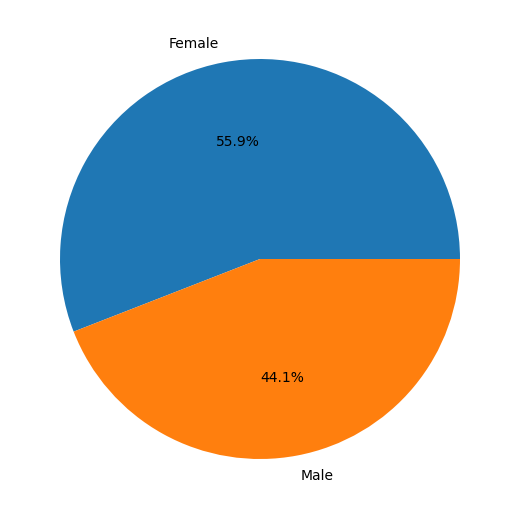

In [29]:
Gender_loyal = churn_data[churn_data['Exited'] == 1] # выявляем лояльных клиентов
Gender_rate = Gender_loyal['Gender'].value_counts() # выбираем данные клиентов по признаку лояльности

fig = plt.figure(figsize=(5, 5)) # строим график в процентном отношении
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    Gender_rate,
    labels = Gender_rate.index,
    autopct = '%.1f%%'
);

Вывод: чаще уходят женщины

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [30]:
bar_dt = churn_DF.groupby(['NumOfProducts', 'Exited'], as_index=False).count() 
# группируем данные по количеству услуг и лояльности
fig = px.bar(
    data_frame = bar_dt,
    x = 'NumOfProducts',
    y = 'CustomerId',
    color = 'Exited',
    barmode = 'group',
    height = 500,
    width = 1000,
    title = 'Соотношение ушедших и лольяных клиентов в зависимости от числа услуг'
);

fig.show()

Вывод: у лояльных клиентов от 1 до 3-ёх услуг, в то время как у ушедших клиентов было до 4-ёх

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [31]:
bar_dt = churn_DF.groupby(['IsActiveMember', 'Exited'], as_index=False).count()
# группируем данные по активности и лояльности клента

bar_dt = bar_dt.replace({'IsActiveMember':{0:'Неактивный', 1:'Активный'}})
# заменяем числовые значения на строки
 
fig = px.bar(
    data_frame = bar_dt,
    x = 'IsActiveMember',
    y = 'CustomerId',
    color = 'Exited',
    barmode = 'group',
    height = 500,
    width = 1000,
    title = 'Соотношение активности ушедших и лольяных клиентов'
);

fig.show()

Вывод: чаще уходят неактивные клиенты. Банку можно запустить систему повышенных кешбеков на покупки в магазинах партнёрах

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [32]:
loyal_fr = churn_data.groupby(['Geography'],as_index=False).mean(numeric_only=True)

fig = px.choropleth(
    data_frame = loyal_fr,
    locations = "Geography", 
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color = "Exited", 
    title = 'Распределение долей ушедших клиентов на карте', 
    width=1000, 
    height=500, 
    color_continuous_scale = 'Blues' 
);

fig.show()

Вывод: максимальная доля ушедших приходится на Германию
Это может быть связано с проблемами описанными в пункте 9.3 в совокупности с тем, что в Германии очень долгие переводы средств и возможно маленькое наличие точек данного банка в стране

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Exited                                                    \
Tenure                0         1         2         3         4         5    
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333   
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

                                                                  
Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229508  0.333333

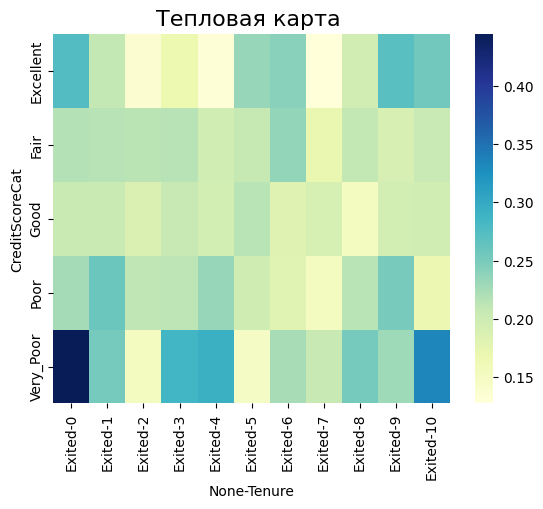

In [33]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
    
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat) 
#  Переводим числовой признак CreditScore в категориальный
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category') 
# меняем тип столбца
cat_score = churn_data.groupby(['CreditScoreCat','Tenure'])[['Exited']].mean().unstack() 
# создаем сводную таблицу
display(cat_score)
heatmap = sns.heatmap(data = cat_score, cmap = 'YlGnBu')
heatmap.set_title('Тепловая карта ', fontsize = 16);

Вывод: чаще всего уходят клиенты с очень бедной кредитной историей